In [75]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Input
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
from statsmodels.tsa.seasonal import seasonal_decompose

In [88]:
dataset_train = pd.read_csv(r'C:\Users\Jaum\Desktop\CursoIA\5.Redes Neurais, Deep Learning e Computer Vision\Google_Stock_Price_Train.csv', index_col='Date', parse_dates=True)
dataset_train

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...
2016-12-23,790.90,792.74,787.28,789.91,"623,400"
2016-12-27,790.68,797.86,787.66,791.55,"789,100"
2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"


In [39]:
dataset_train.shape

(1258, 5)

In [40]:
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[332.83],
       [333.87],
       [330.75],
       ...,
       [794.23],
       [785.93],
       [782.78]])

In [41]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.09640129],
       [0.09834351],
       [0.09251685],
       ...,
       [0.95807422],
       [0.94257381],
       [0.93669113]])

In [42]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[(i - 60):i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train) , np.array(y_train)
X_train

array([[0.09640129, 0.09834351, 0.09251685, ..., 0.07903337, 0.08276841,
        0.08751191],
       [0.09834351, 0.09251685, 0.08881917, ..., 0.08276841, 0.08751191,
        0.08564439],
       [0.09251685, 0.08881917, 0.07671765, ..., 0.08751191, 0.08564439,
        0.08274973],
       ...,
       [0.92416008, 0.92909033, 0.93536519, ..., 0.95637477, 0.95529161,
        0.96485331],
       [0.92909033, 0.93536519, 0.93239584, ..., 0.95529161, 0.96485331,
        0.95807422],
       [0.93536519, 0.93239584, 0.93086447, ..., 0.96485331, 0.95807422,
        0.94257381]])

In [43]:
y_train

array([0.08564439, 0.08274973, 0.07718453, ..., 0.95807422, 0.94257381,
       0.93669113])

In [44]:
X_train.shape

(1198, 60)

In [45]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.09640129],
        [0.09834351],
        [0.09251685],
        ...,
        [0.07903337],
        [0.08276841],
        [0.08751191]],

       [[0.09834351],
        [0.09251685],
        [0.08881917],
        ...,
        [0.08276841],
        [0.08751191],
        [0.08564439]],

       [[0.09251685],
        [0.08881917],
        [0.07671765],
        ...,
        [0.08751191],
        [0.08564439],
        [0.08274973]],

       ...,

       [[0.92416008],
        [0.92909033],
        [0.93536519],
        ...,
        [0.95637477],
        [0.95529161],
        [0.96485331]],

       [[0.92909033],
        [0.93536519],
        [0.93239584],
        ...,
        [0.95529161],
        [0.96485331],
        [0.95807422]],

       [[0.93536519],
        [0.93239584],
        [0.93086447],
        ...,
        [0.96485331],
        [0.95807422],
        [0.94257381]]])

In [46]:
X_train.shape

(1198, 60, 1)

In [47]:
modelo = Sequential()
modelo.add(Input(shape=(X_train.shape[1],1)))
modelo.add(LSTM(units=50, return_sequences=True))
modelo.add(Dropout(0.2))
modelo.add(LSTM(units=50, return_sequences=True))
modelo.add(Dropout(0.2))
modelo.add(LSTM(units=50, return_sequences=True))
modelo.add(Dropout(0.2))
modelo.add(LSTM(units=50))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=1))

In [49]:
modelo.compile(loss='mean_squared_error', optimizer='adam')
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=30)
modelo.fit(X_train, y_train, epochs=500, batch_size=32, callbacks=[es])

Epoch 1/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 127ms/step - loss: 0.0018
Epoch 2/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 145ms/step - loss: 0.0014
Epoch 3/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - loss: 0.0012
Epoch 4/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - loss: 0.0013
Epoch 5/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 0.0012
Epoch 6/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - loss: 0.0014
Epoch 7/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - loss: 0.0013
Epoch 8/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 0.0013
Epoch 9/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - loss: 0.0012
Epoch 10/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - loss: 0.0012
Epoch 11/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 0.0013
Epoch 12/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - loss: 0.0012
Epoch 13/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - loss: 0.0012
Epoch 14/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - loss: 0.0012
Epoch 15/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 6

In [57]:
dataset_test = pd.read_csv(r'C:\Users\Jaum\Desktop\CursoIA\5.Redes Neurais, Deep Learning e Computer Vision\Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [58]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

In [59]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [60]:
inputs = inputs.reshape(-1, 1)
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [61]:
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[(i - 60):i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = modelo.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


array([[791.2918 ],
       [788.0117 ],
       [796.26636],
       [793.1652 ],
       [801.2385 ],
       [809.9428 ],
       [809.88574],
       [807.8403 ],
       [810.6028 ],
       [810.83984],
       [810.57324],
       [809.70355],
       [809.38257],
       [811.04974],
       [811.13184],
       [824.0959 ],
       [828.143  ],
       [834.50214],
       [831.21497],
       [815.60815]], dtype=float32)

In [66]:
dataset_test['Date'] = pd.to_datetime(dataset_test['Date'], format='%d/%m/%Y')
dataset_test

,Date,Open,High,Low,Close,Volume
0,2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
1,2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2,2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
3,2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
4,2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"
5,2017-01-10,807.86,809.13,803.51,804.79,"1,176,800"
6,2017-01-11,805.00,808.15,801.37,807.91,"1,065,900"
7,2017-01-12,807.14,807.39,799.17,806.36,"1,353,100"
8,2017-01-13,807.48,811.22,806.69,807.88,"1,099,200"
9,2017-01-17,807.08,807.14,800.37,804.61,"1,362,100"


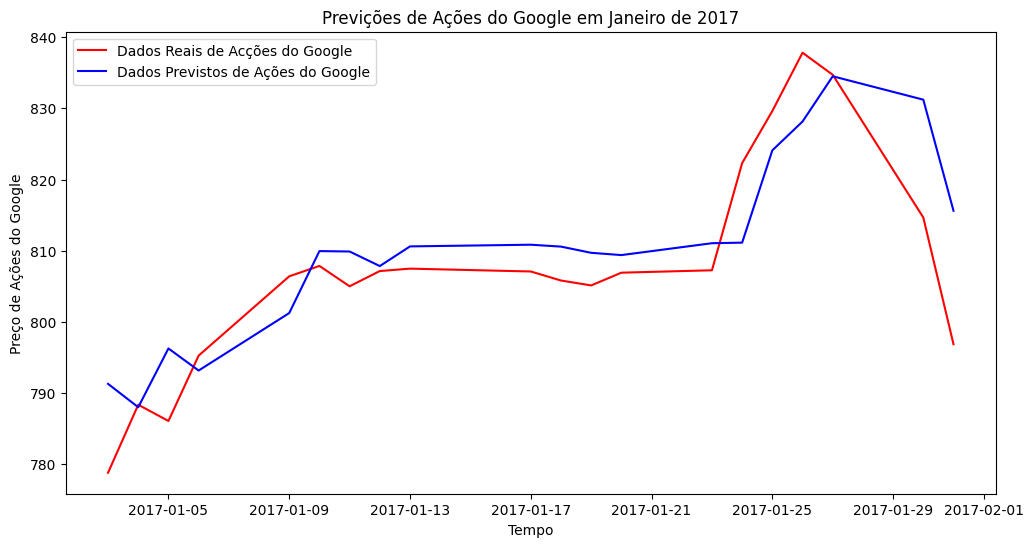

In [72]:
plt.figure(figsize=(12,6))
plt.plot(dataset_test['Date'], real_stock_price, color='r', label='Dados Reais de Acções do Google')
plt.plot(dataset_test['Date'], predicted_stock_price, color='b', label='Dados Previstos de Ações do Google')
plt.title('Previções de Ações do Google em Janeiro de 2017')
plt.xlabel('Tempo')
plt.ylabel('Preço de Ações do Google')
plt.legend()
plt.show()